In [1]:
import os
import sys

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xesmf as xe
import xcdat as xc
import xsearch as xs
import xskillscore as xscore

from glob import glob 
from typing import List, Tuple, Dict, Union, Optional, Any, Callable, Iterable, Sequence, cast

# Ignore xarray warnings (bad practice)
import warnings
warnings.simplefilter("ignore") 

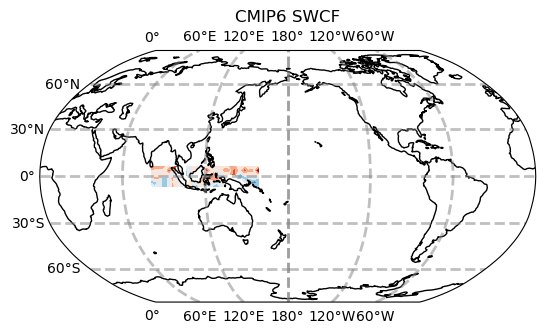

In [32]:
def global_plot(data, lon, lat, cmap, title=""):
    # plot map of global data with central longitude 180
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
    ax1.contourf(
        lon, lat, data,
        transform=ccrs.PlateCarree(), cmap=cmap
    )
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    ax1.coastlines()
    ax1.set_global()
    ax1.set_title(title)
    plt.show()

    
swcf_cmip6 = xr.open_dataarray(f"data/swcf_cmip5_monthly_1850-2000.nc", chunks="auto").to_dataset(name="swcf")
swcf_cmip6 = xc.swap_lon_axis(swcf_cmip6, to=(-180, 180))
swcf_east = swcf_cmip6.sel(lon=slice(80, 160), lat=slice(-7, 7)).isel(model=14)

global_plot(lon=swcf_east.lon, lat=swcf_east.lat, data=swcf_east.swcf, cmap="RdBu_r", title="CMIP6 SWCF")
# swcf_cmip6.isel(model=1)

In [15]:
swcf_cmip6.close()

<xarray.DataArray 'lat' (lat: 72)>
array([-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75, -71.25, -68.75,
       -66.25, -63.75, -61.25, -58.75, -56.25, -53.75, -51.25, -48.75, -46.25,
       -43.75, -41.25, -38.75, -36.25, -33.75, -31.25, -28.75, -26.25, -23.75,
       -21.25, -18.75, -16.25, -13.75, -11.25,  -8.75,  -6.25,  -3.75,  -1.25,
         1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75])
Coordinates:
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Attributes:
    units:    degrees_north
    axis:     Y
    bounds:   lat_bnds


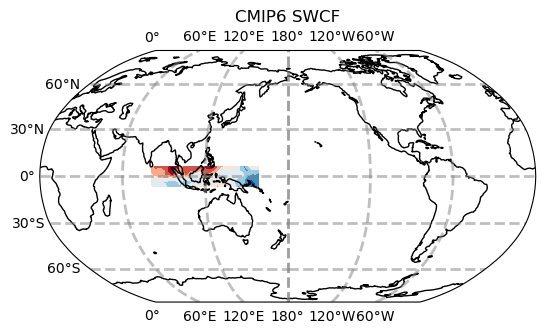

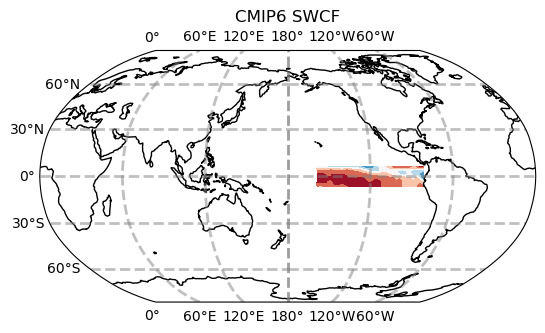

In [20]:
swcre_cmip6 = xr.open_dataset(f"data/swcre_cmip6_monthly_1850-2000.nc", chunks="auto") #.to_dataset(name="swcf")
swcre_cmip6 = xc.swap_lon_axis(swcre_cmip6, to=(-180, 180))
print(swcre_cmip6.lat)
# West pacific
swcre_west = swcre_cmip6.sel(lon=slice(80, 160), lat=slice(-7, 7)).isel(time=1,model=1)
# East pacific
swcre_east = swcre_cmip6.sel(lon=slice(-160, -80), lat=slice(-7, 7)).isel(time=1,model=1)

global_plot(lon=swcre_west.lon, lat=swcre_west.lat, data=swcre_west.swcre, cmap="RdBu_r", title="CMIP6 SWCF")
global_plot(lon=swcre_east.lon, lat=swcre_east.lat, data=swcre_east.swcre, cmap="RdBu_r", title="CMIP6 SWCF")